# Python
FizzBuzz

In [2]:
def fizz_buzz():
    for i in xrange(1, 101):
        if i % 5 == 0 and i % 3 == 0:
            print 'FizzBuzz'
        elif i % 3 == 0:
            print 'Fizz'
        elif i % 5 == 0:
            print 'Buzz'
        else:
            print i

Сотое число Фибоначчи

In [73]:
import numpy as np
from numpy.linalg import matrix_power

def fib(n):
    M = np.array([[1L, 1L], [1L, 0L]], dtype=object)
    M = matrix_power(M, n - 1)
    return M[0, 0]

fib(100)

354224848179261915075L

Быстрая сортировка

In [147]:
def my_sorted(arr):
    if len(arr) <= 1:
        return arr
    v = arr[1:]
    a = v[v <= arr[0]]
    b = v[v > arr[0]]
    return np.concatenate((my_sorted(a), [arr[0]], my_sorted(b)))

In [150]:
arr = np.array([6,4,7,5,3,9,0,10,-3,-6,-2,0, 0,3])
my_sorted(arr)

array([-6, -3, -2,  0,  0,  0,  3,  3,  4,  5,  6,  7,  9, 10])

В одну строчку:

In [151]:
qsort = lambda seq: [] if not seq else qsort(filter(lambda n: n<=seq[0], seq[1:]))+[seq[0]]+qsort(filter(lambda n: n>seq[0], seq[1:]))

In [153]:
arr = [6,4,7,5,3,9,0,10,-3,-6,-2,0, 0,3]
qsort(arr)

[-6, -3, -2, 0, 0, 0, 3, 3, 4, 5, 6, 7, 9, 10]

# NumPy
Аналог numpy.linspace с циклами

In [17]:
def my_loop_linspace(start, stop, num=50, endpoint=True, retstep=False):
    if endpoint:
        step = (stop - start) / float(num - 1)
    else:
        step = (stop - start) / float(num)
    res = []
    for i in xrange(num):
        res.append(start + i*step)
    if retstep:
        return res, step
    return res

my_loop_linspace(2, 3, 5)

[2.0, 2.25, 2.5, 2.75, 3.0]

Аналог numpy.linspace через list comprehension

In [20]:
def my_list_linspace(start, stop, num=50, endpoint=True, retstep=False):
    if endpoint:
        step = (stop - start) / float(num - 1)
    else:
        step = (stop - start) / float(num)
    if retstep:
        return [start + i*step for i in xrange(num)], step
    return [start + i*step for i in xrange(num)]

my_list_linspace(2, 3, 5, False, True)

([2.0, 2.2, 2.4, 2.6, 2.8], 0.2)

Сравним производительность всех трех вариантов

In [28]:
from time import time
def get_perfomance(func):
    start = time()
    func(10, 100, 10000000)
    end = time()
    return end - start

In [29]:
get_perfomance(my_loop_linspace)

4.3960490226745605

In [30]:
get_perfomance(my_list_linspace)

3.2853798866271973

In [31]:
get_perfomance(np.linspace)

0.6087541580200195

linspace, реализованная с помощью цикла, работает в 1,5 раза медленнее, чем её версия, реализованная
через list comprehension, и в 7 раз медленне, чем версия из numpy.

# Matplotlib

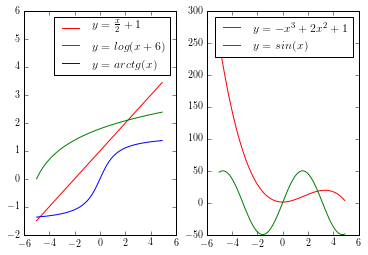

In [72]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

x = np.arange(-5, 5, 0.1)
plt.subplot(1, 2, 1)
plt.ylim(-2, 6)
plt.plot(x, 0.5*x + 1, 'r', label=r'$y=\frac{x}{2}+1$')
plt.plot(x, np.log(x + 6), 'g', label='$y=log(x+6)$')
plt.plot(x, np.arctan(x), 'b', label=r'$y=arctg(x)$')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, -x**3 + 5*x*x + 1, 'r', label='$y=-x^3+2x^2+1$')
plt.plot(x, 50*np.sin(x), 'g', label='$y=sin(x)$')
plt.legend()
plt.savefig('my_plot.svg')

# SciPy

In [68]:
from numpy.linalg import eig, norm
A = np.random.randn(5, 5)
values, vectors = eig(A)

Собственные числа:

In [69]:
values

array([-2.06351735+0.j        , -0.52516091+0.j        ,
        1.67916777+1.68551305j,  1.67916777-1.68551305j,  1.04452332+0.j        ])

Собственные векторы:

In [70]:
vectors

array([[-0.01075080+0.j        , -0.17961569+0.j        ,
        -0.07653507+0.41985871j, -0.07653507-0.41985871j,  0.50804873+0.j        ],
       [ 0.20359150+0.j        , -0.21456407+0.j        ,
        -0.50984440+0.j        , -0.50984440-0.j        ,  0.21030138+0.j        ],
       [ 0.10628822+0.j        , -0.44600737+0.j        ,
        -0.24764218-0.34675123j, -0.24764218+0.34675123j, -0.32404591+0.j        ],
       [-0.90268864+0.j        ,  0.84389649+0.j        ,
         0.23822617-0.38754872j,  0.23822617+0.38754872j,  0.03496425+0.j        ],
       [-0.36371824+0.j        ,  0.10303692+0.j        ,
         0.05144917+0.4083674j ,  0.05144917-0.4083674j , -0.76904588+0.j        ]])

Проверим, что это действительно собственные числа и векторы

In [71]:
for i in xrange(vectors.shape[1]):
    print norm(np.dot(A, vectors[:, i]) - values[i] * vectors[:, i])

5.36314220155e-15
1.28022122411e-15
3.51653394508e-15
3.51653394508e-15
1.89577896107e-15


Получаем, что ошибка не превышает 1e-14, поэтому найденные векторы и числа близки к собственным